In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
import fastgp as fgp

In [5]:
sample_info = pd.read_csv('timecourse_samples.csv', index_col=0)

In [7]:
logexp = pd.read_csv('timecourse_logtpm.csv', index_col=0)

In [147]:
# dfm = logexp.sample(4000, axis=0).T
dfm = logexp.copy().T

In [148]:
X = sample_info[['PC1']]

In [149]:
ks = {
        'SE': np.logspace(0., np.log10(100), 10),
        'PER': np.logspace(0., np.log10(100), 10),
        'linear': 0,
        'const': 0,
#         'null': 0
    }

In [150]:
results = fgp.dyn_de(X, dfm, kernel_space=ks)

/Users/vale/Documents/Research projects/Ongoing/spatial-gp/Python-module/fastgp/fastgp.py:192: RuntimeWarning: divide by zero encountered in log
  max_ll = -0.5 * (n * np.log(2 * np.pi) + n + n * np.log(max_s2_e_hat))
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.59s
INFO:root:Fitting gene models
  0%|          | 0/27723 [00:00<?, ?it/s]/Users/vale/anaconda/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
100%|██████████| 27723/27723 [00:43<00:00, 631.13it/s]


In [151]:
results.model.value_counts()

PER       277230
SE        277230
const      27723
linear     27723
Name: model, dtype: int64

In [152]:
null_lls = results.query('model == "const"')[['g', 'max_ll']]

In [153]:
bic_results = results[results.groupby(['g'])['BIC'].transform(min) == results['BIC']]

In [154]:
bic_results.head()

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC
1,AB338584,inf,inf,0.000000,0.0,553,0.0,NaN,2,const,-inf
2,B3GAT2,inf,8.847647,0.049598,0.0,553,0.0,NaN,2,const,-5.064577
3,NPL,inf,-408.909431,0.154506,0.0,553,0.0,NaN,2,const,830.449577
4,T2,inf,220.322578,0.117489,0.0,553,0.0,NaN,2,const,-428.014440
5,T,inf,1060.707910,0.001511,0.0,553,0.0,NaN,2,const,-2108.785105


In [155]:
final = bic_results.merge(null_lls, on='g',)

In [156]:
final['D'] = final['max_ll_x'] - final['max_ll_y']

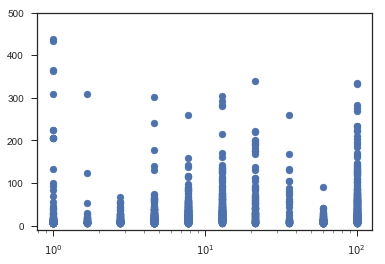

In [175]:
figsize(6, 4)
plt.scatter(final.l, final.D);
plt.xscale('log');
plt.ylim(-10, 500);

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
12393,AK017891,inf,-32.504788,0.169421,0.0,553,0.0,NaN,2,const,77.640291,-32.504788,0.0


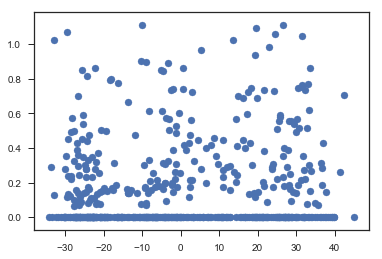

In [158]:
s = dfm.sample(1, axis=1).iloc[:, 0]
plt.scatter(X, s);
final.query('g == "{}"'.format(s.name))

In [159]:
final.sort_values('D', ascending=False).head(10)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
26035,ITGA2,0.000045,4362.873730,0.006190,0.000053,553,0.000455,1.668101,4,SE,-8700.486028,2046.985751,2315.887979
26041,AK133303,0.000045,4546.342571,0.004443,0.000027,553,0.000383,1.668101,4,SE,-9067.423710,2230.454591,2315.887979
26002,SPEER8-PS1,0.000045,3922.134727,0.013736,0.000262,553,0.000364,1.668101,4,SE,-7819.008023,1606.246748,2315.887979
26036,SERPINB11,0.000045,4775.683038,0.002934,0.000012,553,0.000443,1.668101,4,SE,-9526.104643,2459.795058,2315.887979
25975,DQ072380,0.000045,3315.120173,0.013864,0.001190,553,0.000385,1.000000,4,SE,-6604.978913,1275.459983,2039.660190
25866,AK038985,0.000045,3872.475952,0.005060,0.000159,553,0.000357,1.000000,4,SE,-7719.690472,1832.815762,2039.660190
25854,AK042933,0.000045,3004.930630,0.024293,0.003654,553,0.000361,1.000000,4,SE,-5984.599828,965.270440,2039.660190
25915,TSPAN6,0.000045,3979.284078,0.004171,0.000108,553,0.000357,1.000000,4,SE,-7933.306724,1939.623888,2039.660190
25939,SCG2,0.000045,3883.863495,0.000730,0.000151,553,0.000637,1.000000,4,SE,-7742.465558,2036.318648,1847.544847
26070,SIM1,0.000045,2258.868224,0.185100,0.162827,553,0.000370,2.782559,4,SE,-4492.475016,765.723865,1493.144359


In [176]:
final.query('5 < l < 70').sort_values('D', ascending=False).head(20)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
27114,IFIT2,0.363441,-595.880228,1.128751,1.336466,553,0.000646,21.544347,4,SE,1217.021889,-934.327300,338.447071
26893,IFIT3,0.477916,-605.763629,0.961130,1.041542,553,0.000801,12.915497,4,SE,1236.788690,-909.666018,303.902389
27043,CCL5,0.700543,-804.070822,2.811986,1.500696,553,0.000580,12.915497,4,SE,1633.403077,-1097.545716,293.474893
27047,CMPK2,0.631610,-616.664202,1.203485,0.826953,553,0.000576,12.915497,4,SE,1258.589836,-898.986247,282.322045
26999,IRF7,0.675377,-476.958315,0.924378,0.467217,553,0.000640,12.915497,4,SE,979.178061,-757.879852,280.921538
27176,IFI205,0.431743,-644.289484,1.248972,1.355531,553,0.000587,35.938137,4,SE,1313.840399,-905.031833,260.742350
26839,IRG1,0.764360,-679.081890,1.999642,0.867412,553,0.000470,7.742637,4,SE,1383.425211,-939.605244,260.523355
27133,OASL1,0.559172,-636.910610,1.123841,1.012946,553,0.000590,21.544347,4,SE,1299.082653,-859.533675,222.623064
27164,GM4902,0.621210,-655.140912,1.332992,0.977158,553,0.000573,21.544347,4,SE,1335.543257,-875.682660,220.541747
26935,GBP5,0.985645,-571.655746,1.264161,0.457371,553,0.000592,12.915497,4,SE,1168.572924,-786.536026,214.880280


/Users/vale/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


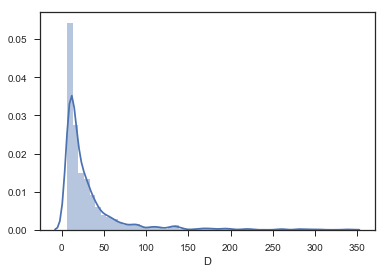

In [187]:
sns.distplot(final.query('5 < l < 70')['D']);

In [189]:
final.query('5 < l < 70 & D > 50').shape

(141, 13)

In [190]:
final.query('5 < l < 70 & D > 50').g

26487           SIK1
26514           FTH1
26515          MNDAL
26516        SLC15A3
26518         MS4A6D
26521         KIF20B
26525          NFKB2
26538          FBXO5
26544       AA467197
26558          MATN4
26559           SDC4
26564        SLC7A11
26573        SLC39A1
26580         NOTCH2
26586         FNBP1L
26588          NFKB1
26607         RNF19B
26631           DENR
26638           ACTB
26653         CLEC4E
26660        GADD45B
26666          ZFP36
26667       ARHGAP33
26710           H1F0
26719       AK045913
26722        BCL2A1A
26740         FAM46D
26744           PLEK
26753         SQSTM1
26756          TNIP1
            ...     
27136         GPR146
27137           CBX3
27138       ARHGAP25
27141          CCND2
27150           IL15
27154            OSM
27156          SLFN1
27160          TIFAB
27162           VCAN
27163          PHF11
27164         GM4902
27165    D14ERTD668E
27167          TRIB1
27173         PARP14
27175          RUNX1
27176         IFI205
27177        

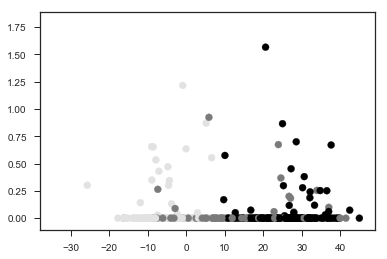

In [231]:
s = dfm['SIK1']
plt.scatter(X, s, c=sample_info.hour);

In [134]:
import seaborn as sns
sns.set_style('ticks')

/Users/vale/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


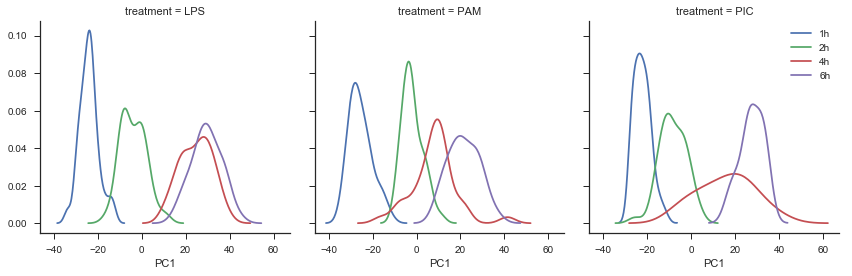

In [145]:
g = sns.FacetGrid(sample_info, hue='timepoint', size=4, col='treatment')
g.map(sns.kdeplot, 'PC1');
plt.legend();

/Users/vale/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


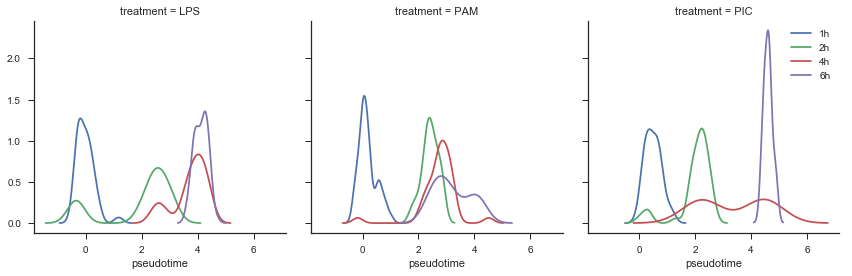

In [146]:
g = sns.FacetGrid(sample_info, hue='timepoint', size=4, col='treatment')
g.map(sns.kdeplot, 'pseudotime');
plt.legend();

In [197]:
final.to_csv('de-analysis-pc1.csv')

In [198]:
import GPy

In [200]:
final.query('5 < l < 70 & D > 50').head()

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D
26487,SIK1,5.379395,-60.086224,0.128168,0.013178,553,0.000880,7.742637,4,SE,145.433879,-120.655422,60.569199
26514,FTH1,4.339586,-120.543985,4.331988,0.165715,553,0.000829,7.742637,4,SE,266.349402,-177.709634,57.165649
26515,MNDAL,2.788087,-653.938360,1.807091,0.239616,553,0.000595,7.742637,4,SE,1333.138152,-769.991544,116.053184
26516,SLC15A3,6.468521,-640.752455,1.896015,0.115941,553,0.000635,7.742637,4,SE,1306.766341,-694.074066,53.321611
26518,MS4A6D,2.901644,-751.779406,2.183204,0.330453,553,0.000604,7.742637,4,SE,1528.820244,-840.111250,88.331844


In [204]:
r = final.query('5 < l < 70 & D > 50').iloc[0]
r

g                      SIK1
max_delta           5.37939
max_ll_x           -60.0862
max_mu_hat         0.128168
max_s2_t_hat      0.0131781
n                       553
time            0.000880241
l                   7.74264
M                         4
model                    SE
BIC                 145.434
max_ll_y           -120.655
D                   60.5692
Name: 26487, dtype: object

In [221]:
X.min(), X.max()

(PC1   -34.032436
 dtype: float64, PC1    44.910398
 dtype: float64)

In [372]:
xx = np.linspace(X.as_matrix().min(), X.as_matrix().max(), 20)[:, None]

In [373]:
import logging
logger = logging.getLogger('GP')
logger.setLevel(logging.ERROR)

In [374]:
def get_fun(r):
    kern = GPy.kern.RBF(1, lengthscale=r['l'], variance=r['max_s2_t_hat'])
    m = GPy.models.GPRegression(X.as_matrix(), dfm[r['g']][:, None], kernel=kern)
    m.likelihood.variance = r['max_delta'] * r['max_s2_t_hat']
    
    yy, _ = m.predict(xx)
    
    return yy

In [375]:
tmp = final.query('5 < l < 70 & D > 30')

In [376]:
tmp.shape

(272, 13)

In [377]:
YYs = np.zeros((tmp.shape[0], xx.shape[0]))

In [378]:
for i, r in enumerate(tmp.T):
    r = tmp.loc[r]
    yy = get_fun(r)
    YYs[i, :] = yy.T

In [379]:
idx = YYs.argmax(1).argsort()[::-1]

In [380]:
from sklearn.preprocessing import scale

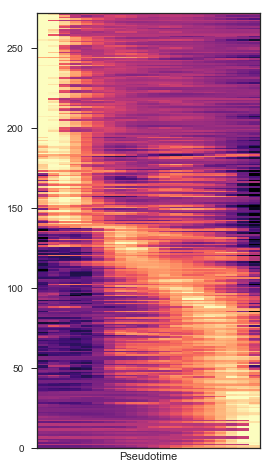

In [381]:
figsize(4, 8)
plt.pcolormesh(scale(YYs[idx, :], 1), cmap=cm.magma, vmin=-2.5, vmax=2.0);
plt.xticks([]);
plt.xlabel('Pseudotime');

In [382]:
tmp.iloc[idx[100:150]][['g']].join(pd.DataFrame({'i': np.arange(100, 150)}, index=tmp.iloc[idx[100:150]].index))

,g,i
27070,MARCO,100
26714,ZC3H12C,101
26514,FTH1,102
26551,RAB32,103
27079,MAPKAPK2,104
27077,MYO 10,105
27132,CXCL3,106
26653,CLEC4E,107
26811,IDI1,108
26855,ITGA5,109


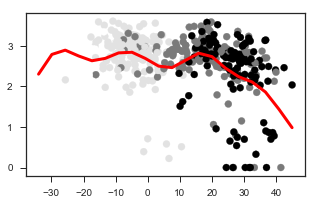

In [388]:
figsize(5, 3)
s = dfm['S100A1']
plt.scatter(X, s, c=sample_info.hour);
plt.plot(xx, YYs[idx[146]], c='r', lw=3);

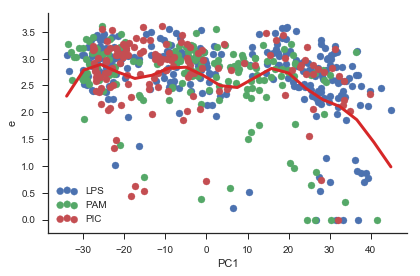

In [393]:
df = sample_info.copy()
df = df.join(pd.DataFrame({'e': dfm['S100A1']}))

g = sns.FacetGrid(df, hue='treatment', aspect=1.5, size=4)
g.map(plt.scatter, 'PC1', 'e')
plt.plot(xx, YYs[idx[146]], c='tab:red', lw=3);
plt.legend(scatterpoints=3);